In [1]:
# Resource: Tanu N Prabhu
# Url: https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce 

# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

## Step 1. Preparation

In [2]:
# Import the training dataset. 
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the data types of the variables
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [4]:
# Split data into numeric and categorical
num_cols=[col for col in df.columns if (df[col].dtype in ("int64", "float64"))]
categ_col=[col for col in df.columns if (df[col].dtype =='object')]

## Step 2. Visualization

Text(0.5, 0, 'Sale Price ($)')

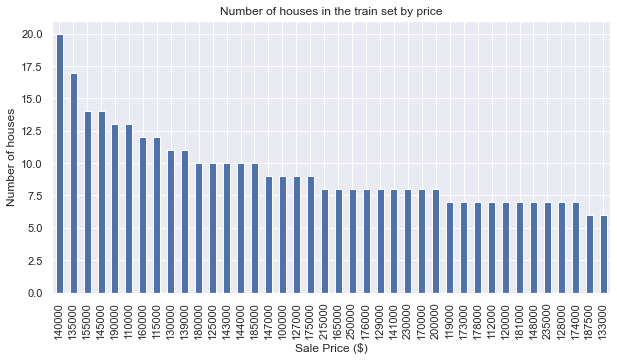

In [5]:
df.SalePrice.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of houses in the train set by price")
plt.ylabel("Number of houses")
plt.xlabel("Sale Price ($)")

### Check outliers

In [6]:
print("The number of plots to be shown: ", len(num_cols))

The number of plots to be shown:  38


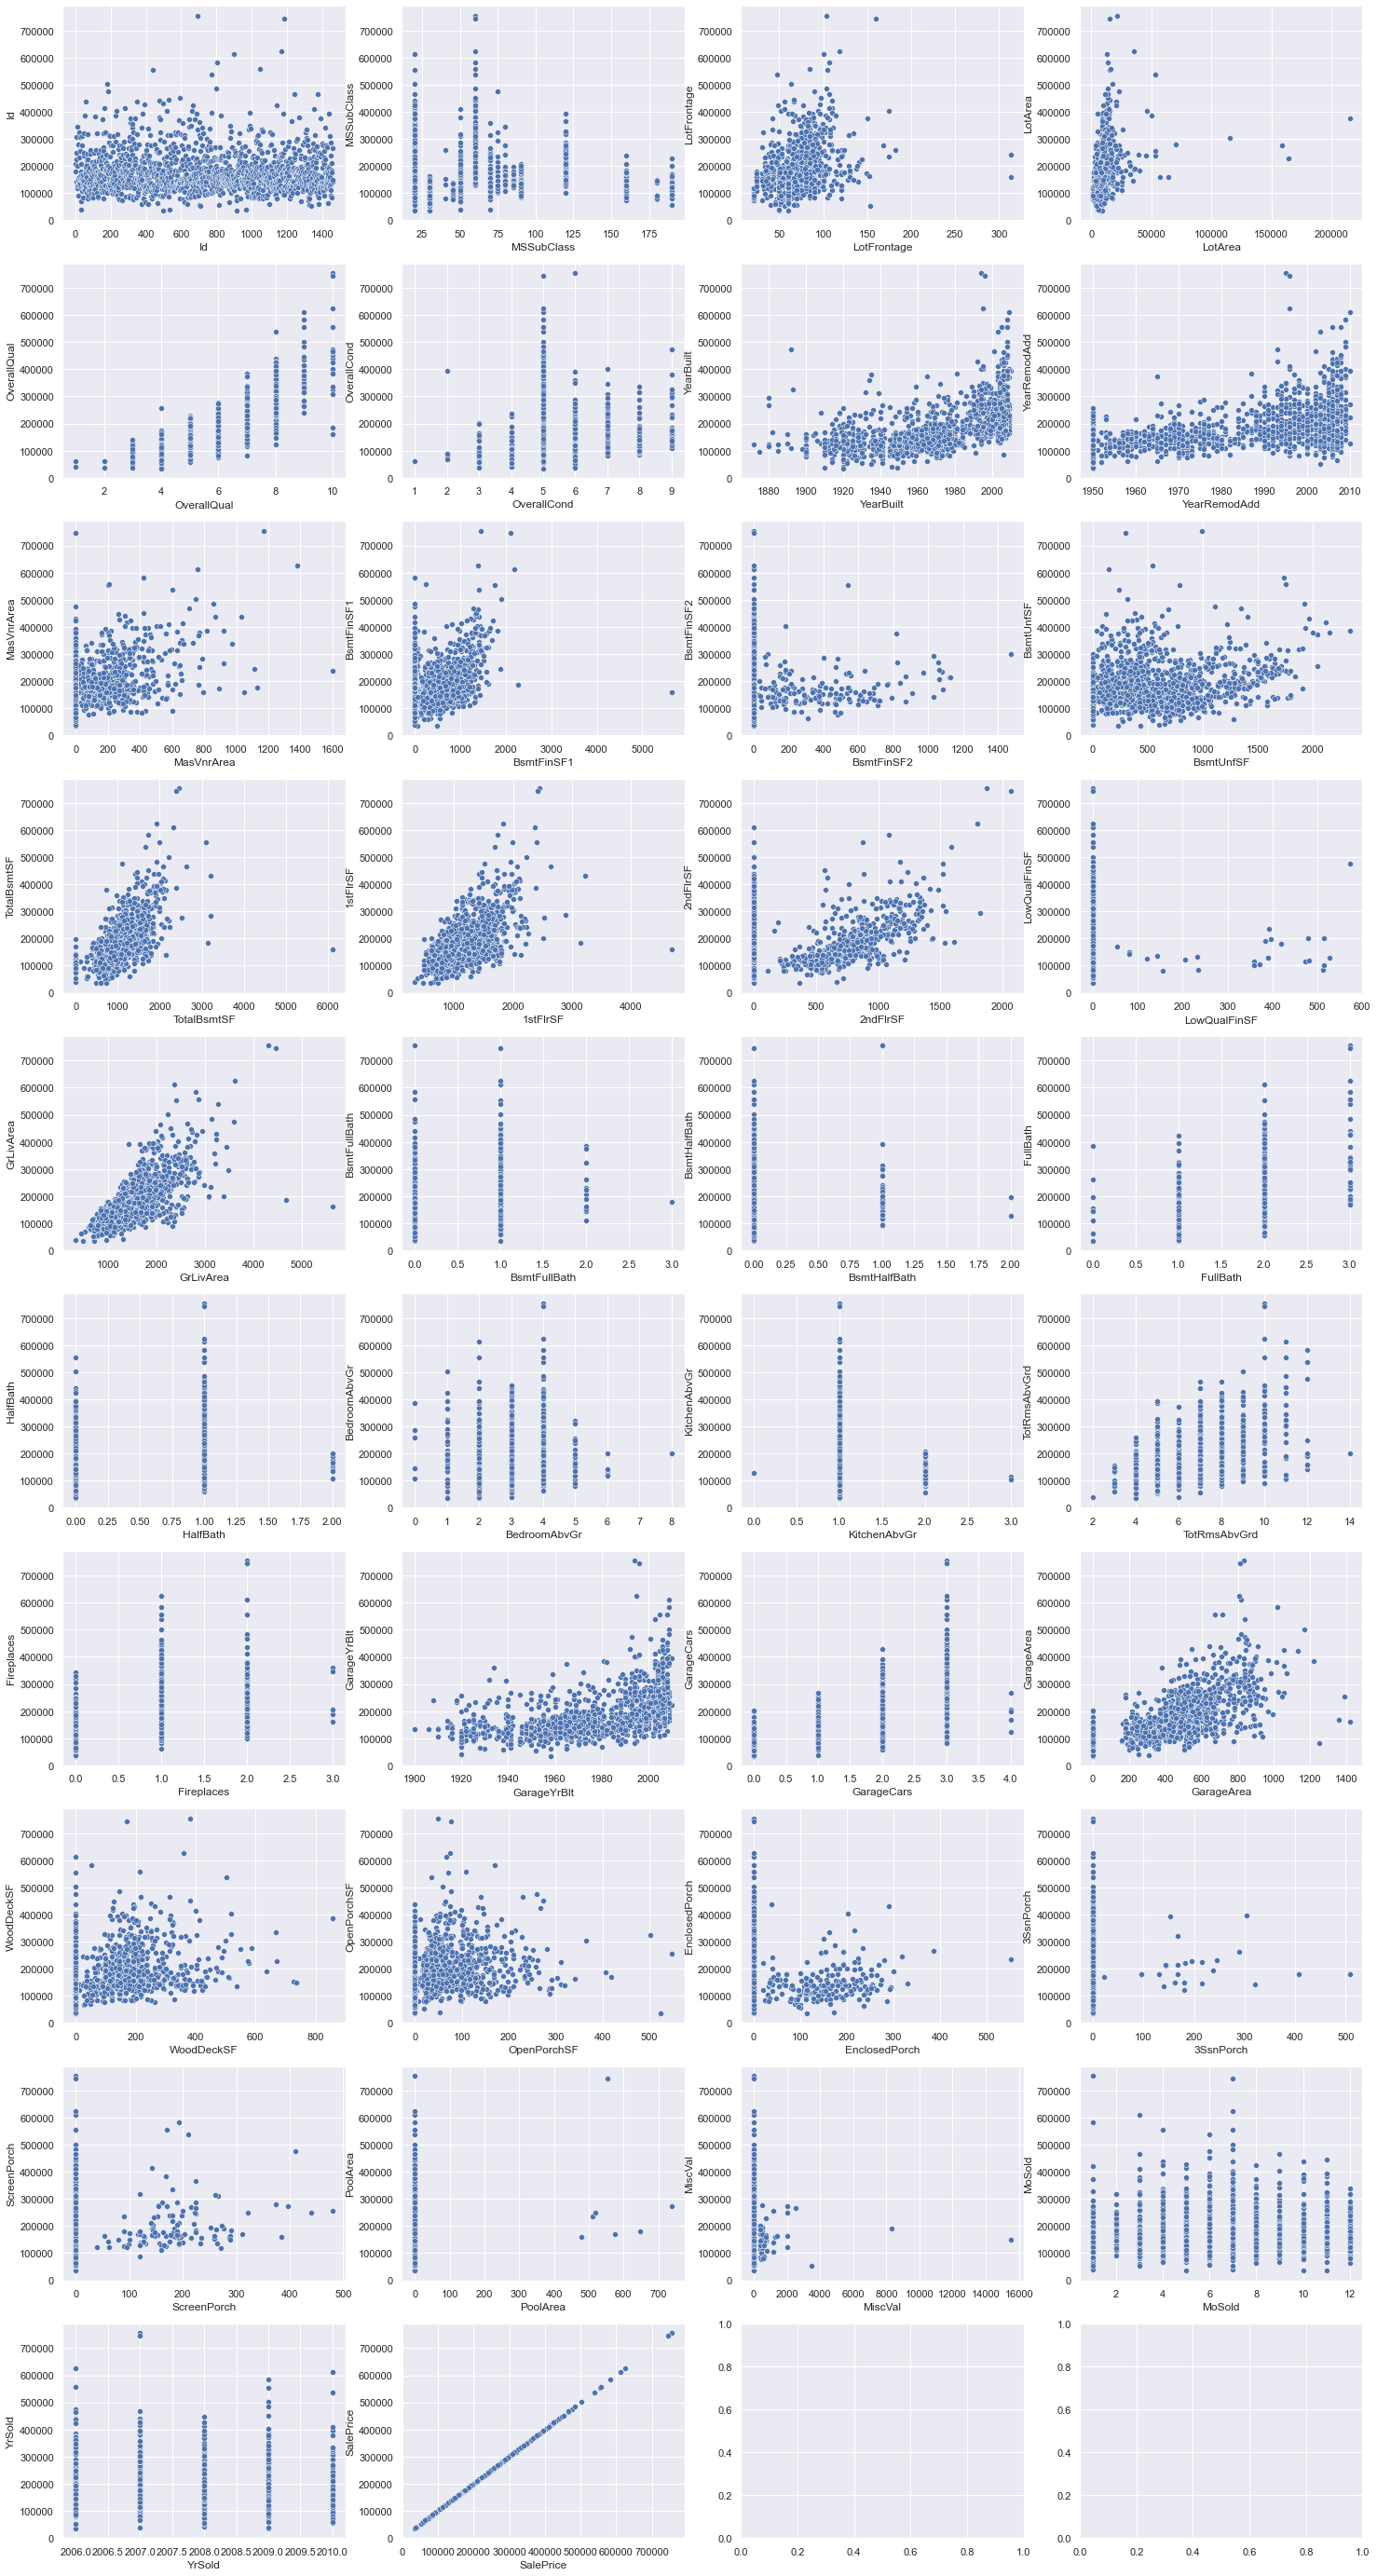

In [7]:
#To see the distribution of num data in relation to the price
fig, ax = plt.subplots(10,4,figsize=(25,50))
ax=ax.flatten()
for i, col in enumerate(num_cols):
    sns.scatterplot(y='SalePrice', x=col, ax=ax[i], data=df)
    ax[i].set_ylabel(col)
plt.show()

There are a few observations can be made from the scatter plots: 
1. Some of the numerical variables are actually discrete variables, such as MSSubClass where the houses are divided into a number of classes. Transforming them into categorical variables may help improve the accuracy of the model. 
2. A few numerical variables have outliers that may attribute to a less accurate model. These outlier observations need to be taken out. 
3. Some of the numerical variables have most of their values being 0, such as LowQUalFinSF. Converting it to a binary variable can be beneficial. 

In [8]:
# Convert numeric variables who have less than 20 distinct values into objective variables. 
for column in df[num_cols]:
    distinct_value = df[column].unique()
    if len(distinct_value)<20:
        df[column] = df[column].astype(str)

num_cols2 = [col for col in df.columns if (df[col].dtype in ("int64", "float64"))]
print("Number of numerical variables left: ", len(num_cols2))

Number of numerical variables left:  23


In [9]:
# Convert variables who have more than 50% of its values 
for column in df[num_cols2]:
    value_list = df[column].values
    count = 0
    for i in value_list:
        if i == 0:
            count += 1
    if count >= 0.5*len(value_list):
        df[column] = df.apply(lambda x: 0 if x[column] == 0 else 1, axis=1)

num_cols3 = [col for col in df[num_cols2].columns if (len(df[col].unique()) > 3)]
print("Number of numerical variables left: ", len(num_cols3))

Number of numerical variables left:  14


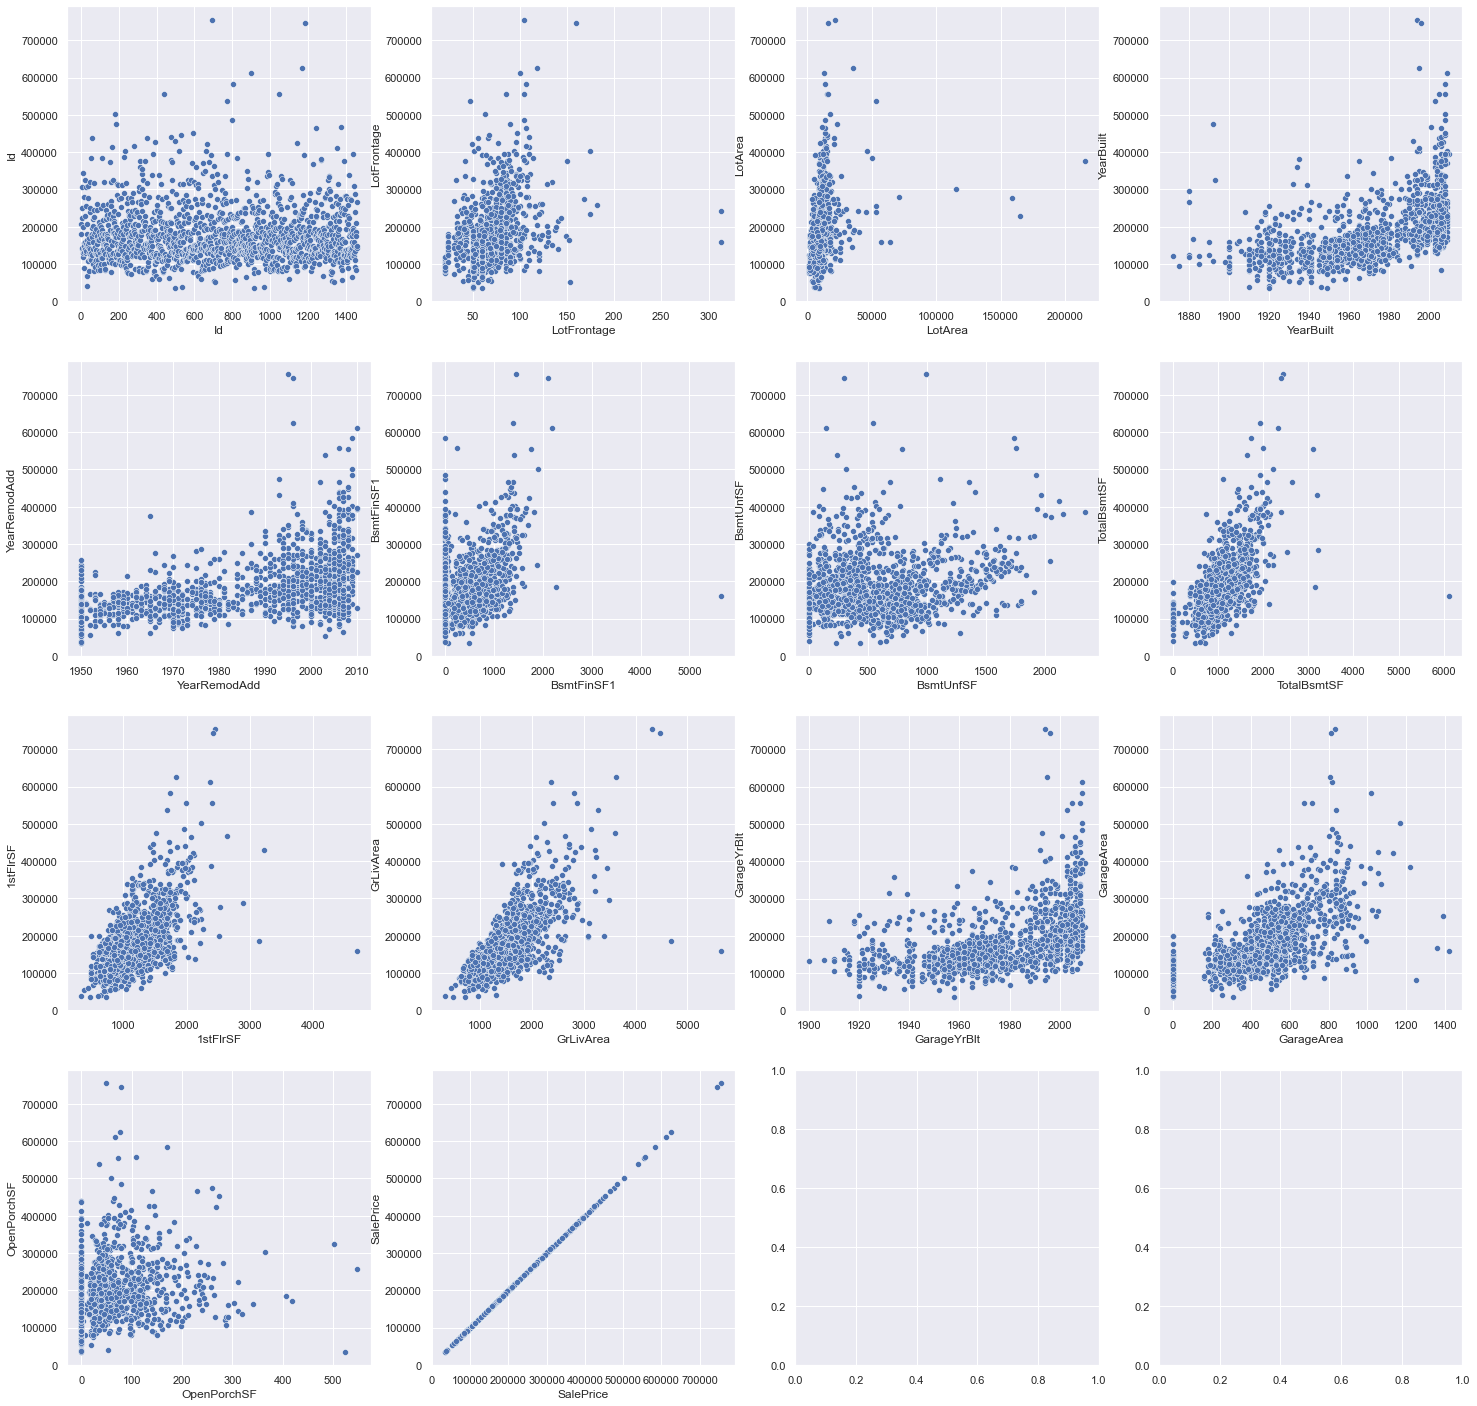

In [10]:
#To see the distribution of num data in relation to the price
fig, ax = plt.subplots(4,4,figsize=(25,25))
ax=ax.flatten()
for i, col in enumerate(num_cols3):
    sns.scatterplot(y='SalePrice', x=col, ax=ax[i], data=df)
    ax[i].set_ylabel(col)
plt.show()

In [11]:
df.shape

(1460, 81)

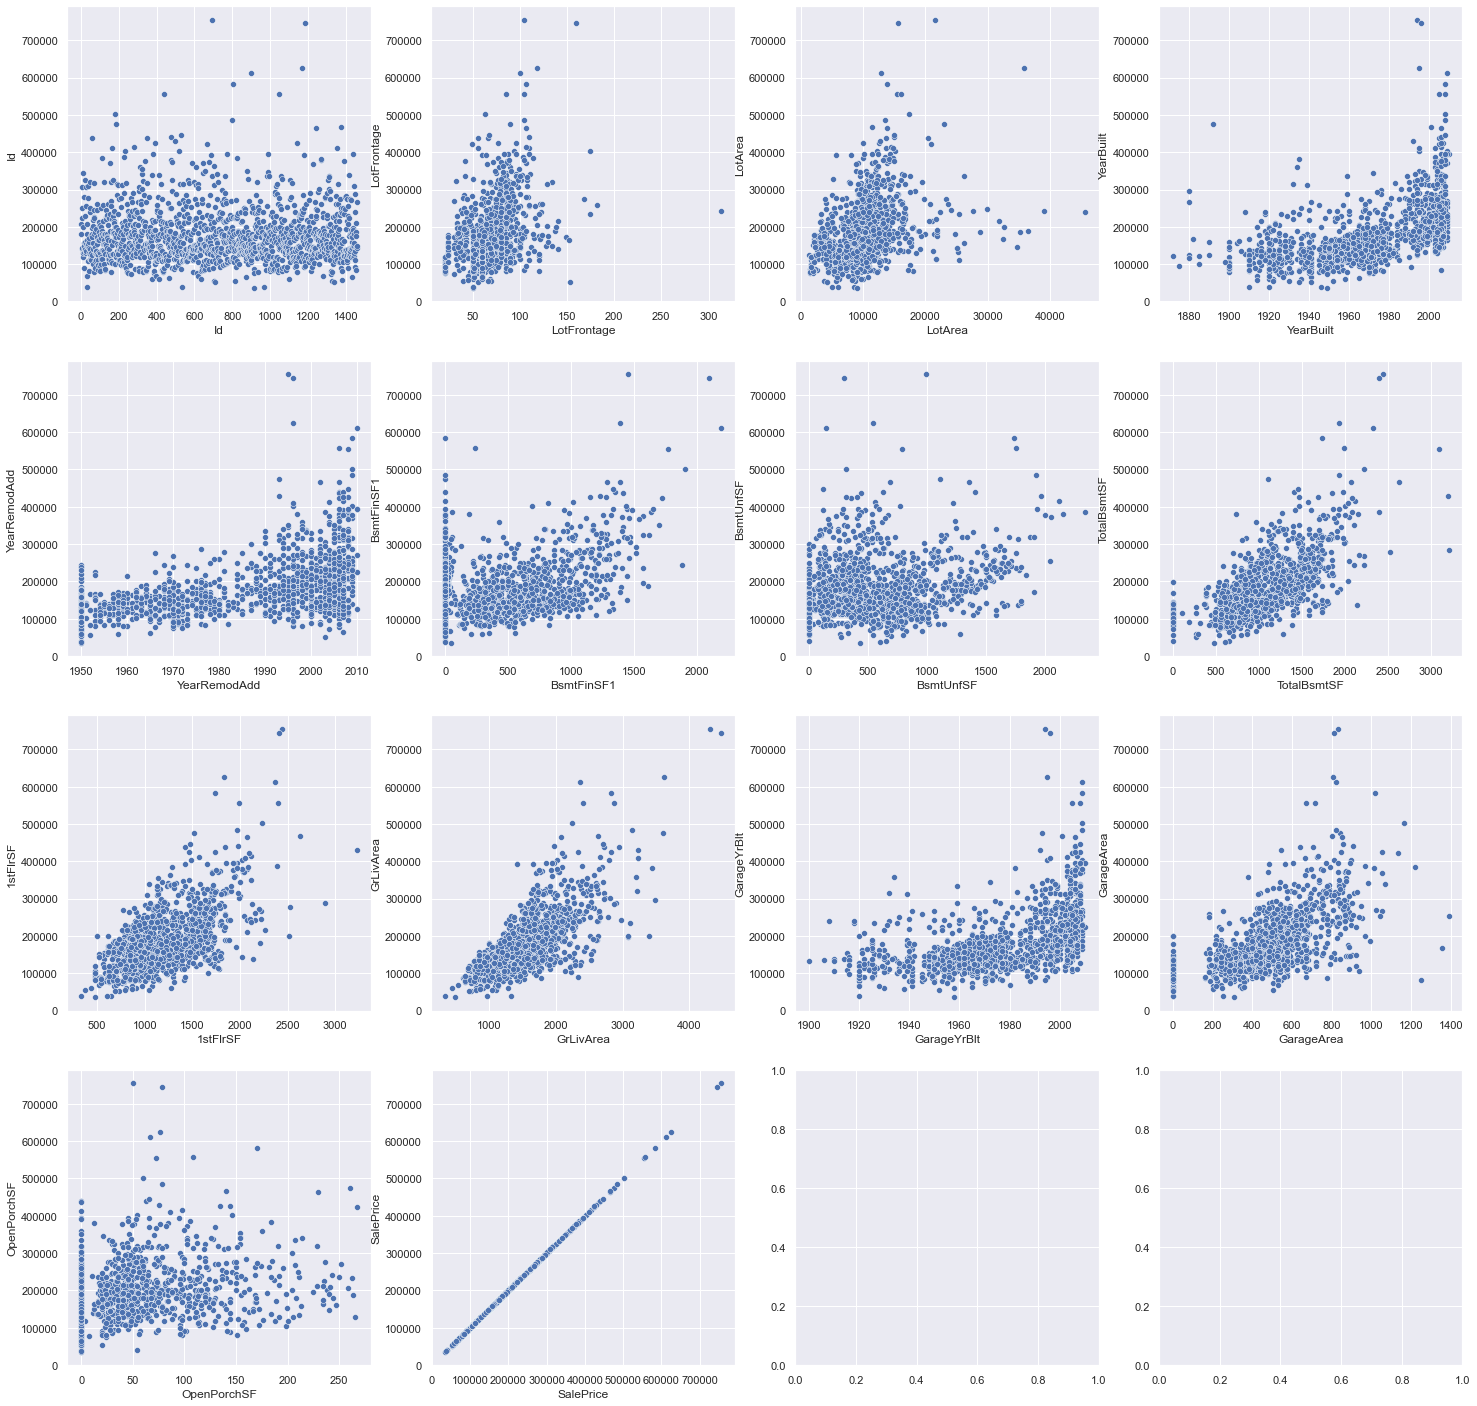

In [12]:
# Going variable by variable to eliminate outliers.
for column in df[num_cols3]:
    value_list = df[column].values
    q1, q3= np.percentile(value_list,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (3 * q1)
    upper_bound = q3 + (3 * q3)

    for j in value_list:
        if j > upper_bound:
            i = df[(df[column]== j)].index
            df = df.drop(i)
        elif j < lower_bound:
            i = df[(df[column] == j)].index
            df = df.drop(i)
        else:
            pass

#To see the distribution of num data in relation to the price
fig, ax = plt.subplots(4,4,figsize=(25,25))
ax=ax.flatten()
for i, col in enumerate(num_cols3):
    sns.scatterplot(y='SalePrice', x=col, ax=ax[i], data=df)
    ax[i].set_ylabel(col)
plt.show()   

In [13]:
df.shape

(1431, 81)

In [14]:
df.to_csv("train_removeO.csv", index = False)